# Assignment 5: Segmentation
The objective of this assignment is to give you experience with segmentation.

In [1]:
# import libraries
import pandas as pd
customer_survey = pd.read_csv("/data/Assignment-5/CustomerSurvey.tsv", sep ='\t', header=1)

In [2]:
customer_survey.to_csv(r'Customer Survey Data.csv')

In [3]:
# pull out the column descriptions
descriptions = customer_survey.loc[0,]
descriptions

obs id                                                Observation Identifier
num eat out                Actual number of times per week that responden...
Jaes most freq             Question asked for the name of the respondent'...
sec most freq              Question asked for the name of the respondent'...
ImpConv                    How important is convenience to you in your se...
Imp Menu Variety           How important is menu variety to you in your s...
Imp Value                  How important is value to you in your selectio...
Imp healthy options        How important are healthy options to you in yo...
Imp taste                  How important is taste of the food to you in y...
Imp friendly staff         How important is the friendliness of the staff...
Imp ambiance               How important is the ambiance of the restauran...
num jaes last month        Actual number of times per month that responde...
Compare covenience         How well does Jae's compare to competitors on ...

In [4]:
# remove descriptions for clean data
df = customer_survey.drop(0)
#df.dtypes

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

df = df[df.applymap(isnumber)]
df = df.apply(pd.to_numeric)
df = df.dropna()
df

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


In [5]:
# What is the variance of each column?  This might be useful in determining which columns to consider in your analysis; e.g., threshold to only use columns above a certain variance.
df.var()

obs id                     3617.714286
num eat out                   2.016436
Jaes most freq                0.234437
sec most freq                 0.193065
ImpConv                       1.548632
Imp Menu Variety              1.106777
Imp Value                     1.447371
Imp healthy options           2.980975
Imp taste                     2.867500
Imp friendly staff            1.616008
Imp ambiance                  1.482157
num jaes last month           4.732748
Compare covenience            2.154396
Compare menu variety          1.364742
Compare value                 1.496341
Compare healthy options       3.014747
Compare taste                 3.269391
Compare friendly staff        2.619779
Compare ambiance              1.494428
gender                        0.223404
age                           0.483789
income                        0.991613
hhld type                     0.484014
kids under 5                  0.426601
kids 5-12                     0.236801
kids over 12             

In [6]:
# We found the mean of all the variances of all the columns which is 1.66 as the threshold. Anyhting above the threshold will be considered in the K-means algorithm
X_var = df[['num eat out','Imp healthy options','Imp taste','num jaes last month','Compare covenience','Compare healthy options','Compare taste','Compare friendly staff']]
X_var

,num eat out,Imp healthy options,Imp taste,num jaes last month,Compare covenience,Compare healthy options,Compare taste,Compare friendly staff
1,4,1.0,5.0,4.0,5.0,1.0,5.0,2.0
2,4,2.0,6.0,5.0,4.0,2.0,6.0,2.0
3,2,6.0,3.0,5.0,3.0,6.0,5.0,5.0
4,2,5.0,4.0,7.0,2.0,5.0,4.0,6.0
5,2,2.0,2.0,2.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...
197,3,1.0,1.0,1.0,3.0,1.0,1.0,1.0
198,3,1.0,1.0,1.0,4.0,1.0,1.0,1.0
199,2,2.0,2.0,1.0,5.0,2.0,2.0,2.0
200,1,2.0,3.0,1.0,6.0,2.0,3.0,3.0


### Now, using the Session 6 activity as as guide, segment the customers and answer all the questions in the write-up requirements.

In [8]:
# import libraries
import numpy as np
#import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from plotnine import *

### Finding the optimal number of clusters using elbow method

In [9]:
# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_var)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

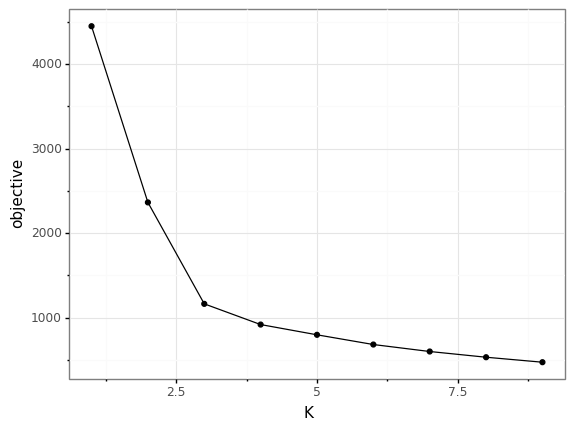

<ggplot: (8783602083220)>

In [10]:
# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

### Fitting K-means

In [11]:
# How do we fit K-means?
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_var)

In [12]:
# These are the assignments of each row to a cluster
kmeans.labels_

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0,
       0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
# These are the cluster centers.  How do we interpret this?
kmeans.cluster_centers_

array([[2.7962963 , 1.64814815, 1.68518519, 1.05555556, 3.41666667,
        1.64814815, 1.68518519, 2.10185185],
       [4.2195122 , 1.51219512, 5.51219512, 4.51219512, 4.53658537,
        1.58536585, 5.3902439 , 2.07317073],
       [1.825     , 5.5       , 3.5       , 5.775     , 2.5       ,
        5.5       , 4.5       , 5.5       ]])

In [14]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])
        
sorted_attr(0, kmeans.cluster_centers_, X_var.columns)
sorted_attr(1, kmeans.cluster_centers_, X_var.columns)
sorted_attr(2, kmeans.cluster_centers_, X_var.columns)

*** Sorted attributes for 0 ***
Compare covenience 3.416666666666667
num eat out 2.7962962962962963
Compare friendly staff 2.101851851851852
Compare taste 1.6851851851851856
Imp taste 1.6851851851851853
Imp healthy options 1.6481481481481484
Compare healthy options 1.6481481481481466
num jaes last month 1.0555555555555514
*** Sorted attributes for 1 ***
Imp taste 5.51219512195122
Compare taste 5.390243902439023
Compare covenience 4.536585365853658
num jaes last month 4.512195121951219
num eat out 4.219512195121952
Compare friendly staff 2.0731707317073162
Compare healthy options 1.5853658536585369
Imp healthy options 1.5121951219512193
*** Sorted attributes for 2 ***
num jaes last month 5.774999999999998
Imp healthy options 5.500000000000002
Compare friendly staff 5.500000000000002
Compare healthy options 5.4999999999999964
Compare taste 4.500000000000001
Imp taste 3.5000000000000004
Compare covenience 2.5
num eat out 1.8250000000000006


In [15]:
# append the clusters to the data
#clustered_data = df.join(pd.DataFrame({'cluster': kmeans.labels_}))
df['cluster'] = kmeans.labels_
df

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,2
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,2
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0


In [176]:
#df.to_csv(r'With Cluster of variance.csv')

In [16]:
# remove descriptions for clean data
df_1= customer_survey.drop(0)
#df.dtypes

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

df_1 = df_1[df_1.applymap(isnumber)]
df_1 = df_1.apply(pd.to_numeric)
df_1 = df_1.dropna()
df_1

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


In [17]:
X_FA = df_1.drop(['obs id','Jaes most freq','sec most freq'], axis=1)
X_FA

,num eat out,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,Imp ambiance,num jaes last month,Compare covenience,...,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
1,4,5.0,4.0,5.0,1.0,5.0,2.0,2.0,4.0,5.0,...,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,4,4.0,4.0,4.0,2.0,6.0,2.0,2.0,5.0,4.0,...,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
3,2,3.0,3.0,3.0,6.0,3.0,5.0,4.0,5.0,3.0,...,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
4,2,2.0,2.0,2.0,5.0,4.0,4.0,5.0,7.0,2.0,...,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0
5,2,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,1.0,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,3,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0
198,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,...,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0
199,2,1.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,5.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
200,1,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,6.0,...,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


### Factor Analysis

In [18]:
transformer = FactorAnalysis(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(X_FA)
transformer.components_

array([[ 0.3462512 ,  0.84874201,  0.77537744,  1.19790816, -0.19161315,
         1.06276276,  0.08832224, -0.08728529,  0.56698763,  0.42784808,
         0.64389935,  1.05358992, -0.16085259,  1.03870884, -0.03366902,
        -0.09646676,  0.1992072 , -0.22867749, -0.42630717, -0.11543494,
        -0.02987281, -0.07479037, -0.00648542],
       [-0.35091607,  0.11243977,  0.23525426, -0.04181865,  1.48640004,
         0.8860043 ,  0.9744907 ,  1.01047982,  1.83598792, -0.41284372,
         0.80352236,  0.5304543 ,  1.48012406,  1.18524253,  1.39227282,
         1.01249778, -0.05257167,  0.28514238,  0.59193975,  0.46551895,
         0.42280808,  0.22131101,  0.02005402],
       [ 0.67390965,  0.34464278,  0.30956822, -0.02835385, -0.5177965 ,
         0.92000039, -0.6006057 , -0.42433989,  0.53651855,  0.37433834,
         0.18430188, -0.14202427, -0.5320887 ,  0.70528492, -0.62296412,
        -0.42844013,  0.23112957, -0.17324451, -0.38914394, -0.1589447 ,
        -0.20091788, -0.0356

In [19]:
# What's important to each factor?
sorted_attr(0, transformer.components_, X_FA.columns)
sorted_attr(1, transformer.components_, X_FA.columns)
sorted_attr(2, transformer.components_, X_FA.columns)

*** Sorted attributes for 0 ***
Imp Value 1.1979081610896938
Imp taste 1.0627627582086883
Compare value  1.0535899247960048
Compare taste 1.0387088446006454
ImpConv 0.8487420098102281
Imp Menu Variety 0.7753774367858141
Compare menu variety 0.6438993472711938
num jaes last month 0.5669876335093403
Compare covenience 0.427848077388331
num eat out 0.34625120491342204
gender 0.19920719731261052
Imp friendly staff 0.08832224483822687
kids over 12 -0.006485415848420192
kids under 5 -0.02987281402276608
Compare friendly staff -0.03366902070563232
kids 5-12 -0.07479037075797101
Imp ambiance -0.08728528976337682
Compare ambiance -0.0964667622161663
hhld type -0.11543493937436335
Compare healthy options -0.16085258926284937
Imp healthy options -0.19161314848750768
age -0.22867749088977818
income -0.42630716599845325
*** Sorted attributes for 1 ***
num jaes last month 1.8359879244019621
Imp healthy options 1.4864000390168208
Compare healthy options 1.4801240649419796
Compare friendly staff 1.392

In [ ]:
### Running K Means on the basis of the output of Factor Analysis

In [20]:
### Running K Means on the basis of the output of Factor Analysis
X_KM_FA = df_1[['Imp Value','Imp taste','Compare value ','Compare taste','Imp ambiance','Compare ambiance','num jaes last month','Compare covenience','Imp friendly staff','Compare friendly staff','Imp healthy options','Compare healthy options']]
X_KM_FA

,Imp Value,Imp taste,Compare value,Compare taste,Imp ambiance,Compare ambiance,num jaes last month,Compare covenience,Imp friendly staff,Compare friendly staff,Imp healthy options,Compare healthy options
1,5.0,5.0,5.0,5.0,2.0,2.0,4.0,5.0,2.0,2.0,1.0,1.0
2,4.0,6.0,4.0,6.0,2.0,2.0,5.0,4.0,2.0,2.0,2.0,2.0
3,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,6.0,6.0
4,2.0,4.0,4.0,4.0,5.0,5.0,7.0,2.0,4.0,6.0,5.0,5.0
5,3.0,2.0,3.0,2.0,3.0,3.0,2.0,1.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197,2.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
198,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
199,3.0,2.0,3.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0
200,3.0,3.0,3.0,3.0,2.0,2.0,1.0,6.0,3.0,3.0,2.0,2.0


In [21]:
# K means on FA output

kmeans_FA = KMeans(n_clusters=3, random_state=0).fit(X_KM_FA)

In [22]:
# These are the assignments of each row to a cluster
kmeans_FA.labels_

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [23]:
# These are the cluster centers.  How do we interpret this?
kmeans_FA.cluster_centers_

array([[2.5       , 1.68518519, 2.5       , 1.68518519, 2.22222222,
        2.22222222, 1.05555556, 3.41666667, 2.10185185, 2.10185185,
        1.64814815, 1.64814815],
       [2.5       , 3.5       , 4.        , 4.5       , 4.5       ,
        4.5       , 5.775     , 2.5       , 4.5       , 5.5       ,
        5.5       , 5.5       ],
       [4.48780488, 5.51219512, 4.48780488, 5.3902439 , 2.        ,
        1.97560976, 4.51219512, 4.53658537, 2.        , 2.07317073,
        1.51219512, 1.58536585]])

In [24]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])
        
sorted_attr(0, kmeans_FA.cluster_centers_, X_KM_FA.columns)
sorted_attr(1, kmeans_FA.cluster_centers_, X_KM_FA.columns)
sorted_attr(2, kmeans_FA.cluster_centers_, X_KM_FA.columns)


# Does this give the full picture?  What's missing?

*** Sorted attributes for 0 ***
Compare covenience 3.416666666666667
Imp Value 2.500000000000001
Compare value  2.4999999999999996
Imp ambiance 2.222222222222222
Compare ambiance 2.222222222222222
Compare friendly staff 2.101851851851852
Imp friendly staff 2.101851851851851
Compare taste 1.6851851851851856
Imp taste 1.6851851851851853
Imp healthy options 1.6481481481481484
Compare healthy options 1.6481481481481466
num jaes last month 1.0555555555555514
*** Sorted attributes for 1 ***
num jaes last month 5.774999999999998
Compare friendly staff 5.500000000000002
Imp healthy options 5.500000000000002
Compare healthy options 5.4999999999999964
Compare taste 4.500000000000001
Compare ambiance 4.5
Imp friendly staff 4.5
Imp ambiance 4.499999999999999
Compare value  3.9999999999999996
Imp taste 3.5000000000000004
Imp Value 2.5000000000000004
Compare covenience 2.5
*** Sorted attributes for 2 ***
Imp taste 5.51219512195122
Compare taste 5.390243902439023
Compare covenience 4.536585365853658


In [25]:
# append the clusters to the data
df_1['cluster'] = kmeans_FA.labels_
df_1

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,2
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0


In [191]:
#df.to_csv(r'With CLuster of FA.csv')

### Run Factor analysis with a better number of factors

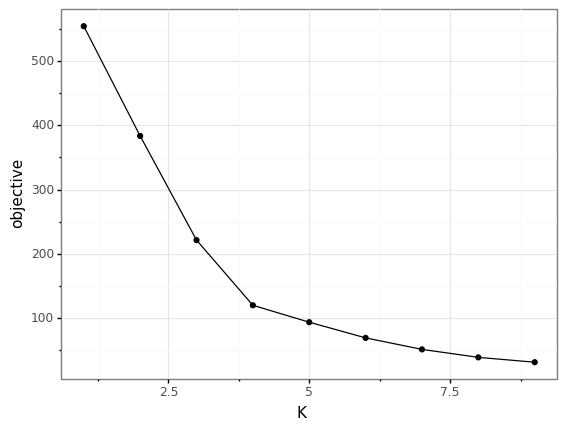

<ggplot: (8783598304509)>

In [29]:
# Let's cluster based on the FA scores

# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

### NON CUSTOMER DATA
Note: the simplest approach in this phase of your analysis will be to use crosstabs on the noncustomer survey data.

In [30]:
noncustomer_survey = pd.read_csv("/data/Assignment-5/NoncustomerSurvey.tsv", sep ='\t', header=1)

In [31]:
# pull out the column descriptions
noncustomer_descriptions = noncustomer_survey.loc[0,]
noncustomer_descriptions

obs                                                          Observation Identifier
#times/wk eat lunch/dinner out    Actual number of times per week that responden...
FCR most freq                     Question asked for the name of the respondent'...
FCR sec most freq                 Question asked for the name of the respondent'...
Imp convenient                    How important is convenience to you in your se...
Imp menu variety                  How important is menu variety to you in your s...
Imp value                         How important is value to you in your selectio...
Imp healty options                How important are healthy options to you in yo...
Imp taste                         How important is taste of the food to you in y...
Imp friendly staff                How important is the friendliness of the staff...
Imp ambience                      How important is the ambiance of the restauran...
gender                                                   Gender:  1= Female,

In [32]:
# remove descriptions for clean data
noncustomer_df = noncustomer_survey.drop(0)

 #turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    
    except:
        return False

noncustomer_df = noncustomer_df[noncustomer_df.applymap(isnumber)]
noncustomer_df = noncustomer_df.apply(pd.to_numeric)
noncustomer_df = noncustomer_df.dropna()
noncustomer_df

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,13,5.0,1.0,1.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
145,18,3.0,1.0,1.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
146,31,6.0,1.0,1.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
147,43,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2


In [33]:
# What is the variance of each column?  This might be useful in determining which columns to consider in your analysis; e.g., threshold to only use columns above a certain variance.
noncustomer_df.var()

obs                               5759.197399
#times/wk eat lunch/dinner out       3.650251
FCR most freq                        0.247731
FCR sec most freq                    0.250982
Imp convenient                       1.635551
Imp menu variety                     1.292576
Imp value                            2.293185
Imp healty options                   4.165018
Imp taste                            2.746850
Imp friendly staff                   2.242853
Imp ambience                         1.750779
gender                               0.240618
age                                  0.622951
income                               1.138057
hhld type                            0.750373
kids under 5                         0.513210
kids 5-12                            0.226257
kids over 12                         0.421691
area                                 0.251456
dtype: float64

In [34]:
# We found the mean of all the variances of all the columns which is 1.35 as the threshold. Anyhting above the threshold will be considered in the K-means algorithm
X_NC_var = noncustomer_df[['#times/wk eat lunch/dinner out','Imp convenient','Imp value ','Imp healty options','Imp taste','Imp friendly staff','Imp ambience']]
X_NC_var

,#times/wk eat lunch/dinner out,Imp convenient,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience
1,5.0,4,5,2.0,6,2.0,1
2,3.0,5,4,1.0,5,2.0,3
3,6.0,4,5,1.0,4,2.0,2
4,1.0,2,2,6.0,3,4.0,4
5,1.0,3,2,5.0,4,5.0,3
...,...,...,...,...,...,...,...
144,5.0,4,5,2.0,6,2.0,1
145,3.0,5,4,1.0,5,2.0,3
146,6.0,4,5,1.0,4,2.0,2
147,1.0,2,2,6.0,3,4.0,4


In [35]:
# K means on Variance Non Cutomer output

kmeans_NC_var = KMeans(n_clusters=3, random_state=0).fit(X_NC_var)

In [36]:
# These are the assignments of each row to a cluster
kmeans_NC_var.labels_

array([1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2,
       1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

In [37]:
# These are the cluster centers.  How do we interpret this?
kmeans_NC_var.cluster_centers_

array([[1.36363636, 2.36363636, 2.36363636, 5.54545455, 3.59090909,
        4.70454545, 4.02272727],
       [4.64444444, 4.33333333, 4.68888889, 1.33333333, 5.02222222,
        1.97777778, 2.02222222],
       [1.39393939, 1.54545455, 1.3030303 , 1.93939394, 1.18181818,
        1.48484848, 1.66666667]])

In [38]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])
        
sorted_attr(0, kmeans_NC_var.cluster_centers_, X_NC_var.columns)
sorted_attr(1, kmeans_NC_var.cluster_centers_, X_NC_var.columns)
sorted_attr(2, kmeans_NC_var.cluster_centers_, X_NC_var.columns)

# Does this give the full picture?  What's missing?

*** Sorted attributes for 0 ***
Imp healty options 5.545454545454544
Imp friendly staff 4.704545454545453
Imp ambience 4.022727272727272
Imp taste 3.590909090909091
Imp convenient 2.3636363636363633
Imp value  2.3636363636363633
#times/wk eat lunch/dinner out 1.3636363636363642
*** Sorted attributes for 1 ***
Imp taste 5.022222222222223
Imp value  4.688888888888889
#times/wk eat lunch/dinner out 4.644444444444446
Imp convenient 4.333333333333332
Imp ambience 2.022222222222222
Imp friendly staff 1.9777777777777774
Imp healty options 1.3333333333333337
*** Sorted attributes for 2 ***
Imp healty options 1.9393939393939406
Imp ambience 1.6666666666666667
Imp convenient 1.5454545454545443
Imp friendly staff 1.4848484848484844
#times/wk eat lunch/dinner out 1.3939393939393938
Imp value  1.3030303030303023
Imp taste 1.181818181818182


### Finding the optimal number of clusters using elbow method

In [39]:
# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_NC_var)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

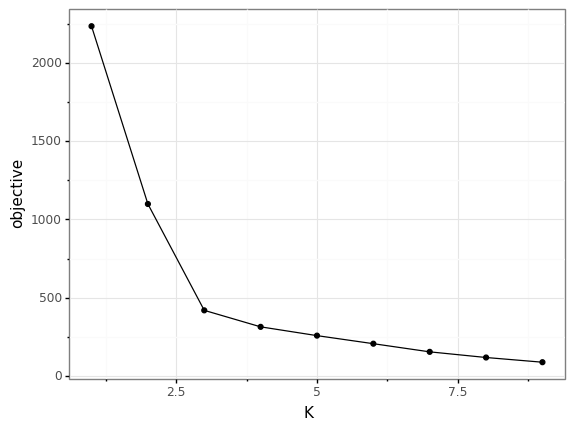

<ggplot: (8783598246348)>

In [40]:
# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

In [41]:
# append the clusters to the data
noncustomer_df['cluster'] = kmeans_NC_var.labels_
noncustomer_df

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area,cluster
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1,1
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1,1
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2,0
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,13,5.0,1.0,1.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1
145,18,3.0,1.0,1.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1,1
146,31,6.0,1.0,1.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1,1
147,43,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2,0


In [42]:
noncustomer_df.to_csv(r'NC var.csv')

### Factor Analysis

In [43]:
# remove descriptions for clean data
noncustomer_df_1 = noncustomer_survey.drop(0)

 #turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    
    except:
        return False

noncustomer_df_1 = noncustomer_df_1[noncustomer_df_1.applymap(isnumber)]
noncustomer_df_1= noncustomer_df_1.apply(pd.to_numeric)
noncustomer_df_1 = noncustomer_df_1.dropna()
noncustomer_df_1

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,13,5.0,1.0,1.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
145,18,3.0,1.0,1.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
146,31,6.0,1.0,1.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
147,43,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2


In [44]:
X_NC_FA = noncustomer_df_1.drop(['obs','FCR most freq','FCR sec most freq'], axis=1)
X_NC_FA

,#times/wk eat lunch/dinner out,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
1,5.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,3.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
3,6.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
4,1.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2
5,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,5.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
145,3.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
146,6.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
147,1.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2


In [45]:
transformer = FactorAnalysis(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(X_NC_FA)
transformer.components_

array([[ 1.65402604e+00,  1.03806738e+00,  8.85224150e-01,
         1.37639533e+00, -1.30541799e+00,  1.13456985e+00,
        -6.80370556e-01, -5.23347144e-01,  4.59488085e-01,
        -5.24847043e-01, -5.70135197e-01, -5.50903384e-01,
        -3.71261063e-01, -2.18278906e-01, -1.50696124e-01,
        -3.45074845e-01],
       [-1.41047484e-01, -2.90605894e-01, -4.16680589e-01,
        -5.55725468e-01, -1.34995004e+00, -9.28654668e-01,
        -1.27346331e+00, -9.45641698e-01,  2.57546625e-02,
         9.54534362e-02, -8.07271374e-01, -4.78099765e-01,
        -1.67508213e-01, -2.13752216e-01, -3.47154238e-02,
        -2.27500688e-01],
       [ 5.29258832e-01, -3.30959221e-01, -1.78974777e-01,
         1.37759383e-01, -1.90193037e-01, -5.51824503e-01,
        -1.77538322e-01,  4.48687308e-02,  4.76780076e-03,
         1.25949822e-02,  2.56913073e-01,  2.53668978e-01,
        -2.16405846e-02,  1.26035984e-04,  1.85287085e-01,
         2.65677770e-02]])

In [46]:
# What's important to each factor?
sorted_attr(0, transformer.components_, X_NC_FA.columns)
sorted_attr(1, transformer.components_, X_NC_FA.columns)
sorted_attr(2, transformer.components_, X_NC_FA.columns)

*** Sorted attributes for 0 ***
#times/wk eat lunch/dinner out 1.6540260425676303
Imp value  1.3763953285843784
Imp taste 1.1345698451079418
Imp convenient 1.038067376704701
Imp menu variety 0.8852241495979611
gender 0.45948808505254457
kids over 12 -0.15069612351269732
kids 5-12 -0.2182789064258756
area -0.3450748447760797
kids under 5 -0.37126106340149967
Imp ambience -0.5233471437271742
age -0.5248470429140041
hhld type -0.5509033841117847
income -0.5701351974544214
Imp friendly staff -0.6803705561022335
Imp healty options -1.3054179879298455
*** Sorted attributes for 1 ***
age 0.0954534361623066
gender 0.025754662477313568
kids over 12 -0.03471542384471357
#times/wk eat lunch/dinner out -0.14104748362811567
kids under 5 -0.1675082125887926
kids 5-12 -0.21375221609280934
area -0.22750068837661608
Imp convenient -0.2906058938410233
Imp menu variety -0.4166805887284938
hhld type -0.4780997646574366
Imp value  -0.5557254676933959
income -0.8072713743689035
Imp taste -0.9286546683915907

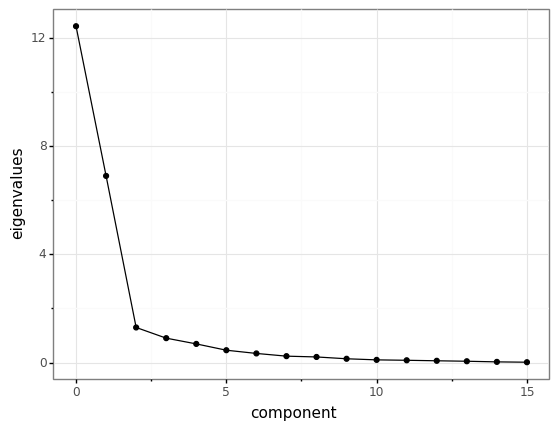

<ggplot: (-9223363253256501255)>

In [47]:
# scree plot
from sklearn.decomposition import PCA
pca = PCA().fit(X_NC_FA)
scree_data = pd.DataFrame({'eigenvalues': pca.explained_variance_, 
                           'component': range(len(pca.explained_variance_))})
# plot the results; what K is best?
(ggplot(scree_data)                      # defining what data to use
 + aes(x='component', y='eigenvalues')   # map variables to attributes
 + geom_point() + geom_line()            # defining the type of geometric objects to use
 + theme_bw()                            # other aestheic attributes
)

## Run factor analysis with better number of factors

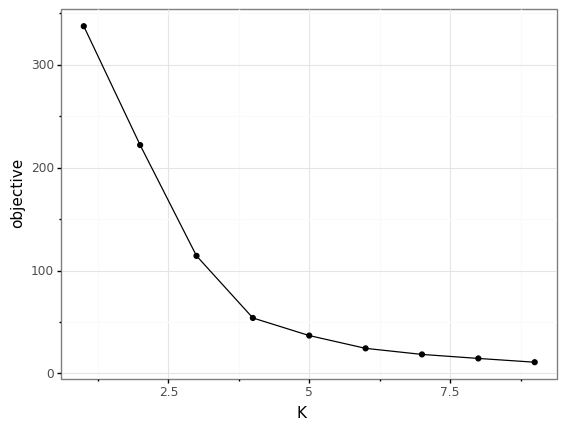

<ggplot: (8783598209277)>

In [48]:
# Let's cluster based on the FA scores

# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

In [49]:
### Running K Means on the basis of the output of Factor Analysis
X_NC_KM_FA = noncustomer_df_1[['#times/wk eat lunch/dinner out','Imp value ','Imp taste','Imp convenient','Imp menu variety','Imp ambience','Imp friendly staff','Imp healty options']]
X_NC_KM_FA

,#times/wk eat lunch/dinner out,Imp value,Imp taste,Imp convenient,Imp menu variety,Imp ambience,Imp friendly staff,Imp healty options
1,5.0,5,6,4,5.0,1,2.0,2.0
2,3.0,4,5,5,3.0,3,2.0,1.0
3,6.0,5,4,4,3.0,2,2.0,1.0
4,1.0,2,3,2,2.0,4,4.0,6.0
5,1.0,2,4,3,2.0,3,5.0,5.0
...,...,...,...,...,...,...,...,...
144,5.0,5,6,4,5.0,1,2.0,2.0
145,3.0,4,5,5,3.0,3,2.0,1.0
146,6.0,5,4,4,3.0,2,2.0,1.0
147,1.0,2,3,2,2.0,4,4.0,6.0


In [50]:
# K means on FA output
kmeans_NC_FA = KMeans(n_clusters=3, random_state=0).fit(X_NC_KM_FA)

In [51]:
# These are the assignments of each row to a cluster
kmeans_NC_FA.labels_

array([1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1,
       2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0,
       1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0,
       0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2], dtype=int32)

In [52]:
# These are the cluster centers.  How do we interpret this?
kmeans_NC_FA.cluster_centers_

array([[1.39393939, 1.3030303 , 1.18181818, 1.54545455, 1.54545455,
        1.66666667, 1.48484848, 1.93939394],
       [4.64444444, 4.68888889, 5.02222222, 4.33333333, 3.68888889,
        2.02222222, 1.97777778, 1.33333333],
       [1.36363636, 2.36363636, 3.59090909, 2.36363636, 2.36363636,
        4.02272727, 4.70454545, 5.54545455]])

In [53]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])
        
sorted_attr(0, kmeans_NC_FA.cluster_centers_, X_NC_KM_FA.columns)
sorted_attr(1, kmeans_NC_FA.cluster_centers_, X_NC_KM_FA.columns)
sorted_attr(2, kmeans_NC_FA.cluster_centers_, X_NC_KM_FA.columns)


# Does this give the full picture?  What's missing?

*** Sorted attributes for 0 ***
Imp healty options 1.9393939393939406
Imp ambience 1.6666666666666667
Imp menu variety 1.5454545454545463
Imp convenient 1.5454545454545443
Imp friendly staff 1.4848484848484844
#times/wk eat lunch/dinner out 1.3939393939393938
Imp value  1.3030303030303023
Imp taste 1.181818181818182
*** Sorted attributes for 1 ***
Imp taste 5.022222222222223
Imp value  4.688888888888889
#times/wk eat lunch/dinner out 4.644444444444446
Imp convenient 4.333333333333332
Imp menu variety 3.68888888888889
Imp ambience 2.022222222222222
Imp friendly staff 1.9777777777777774
Imp healty options 1.3333333333333337
*** Sorted attributes for 2 ***
Imp healty options 5.545454545454544
Imp friendly staff 4.704545454545453
Imp ambience 4.022727272727272
Imp taste 3.590909090909091
Imp menu variety 2.3636363636363638
Imp value  2.3636363636363633
Imp convenient 2.3636363636363633
#times/wk eat lunch/dinner out 1.3636363636363642


In [54]:
# append the clusters to the data
noncustomer_df_1['cluster'] = kmeans_NC_FA.labels_
noncustomer_df_1

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area,cluster
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1,1
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1,1
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2,2
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,13,5.0,1.0,1.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1
145,18,3.0,1.0,1.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1,1
146,31,6.0,1.0,1.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1,1
147,43,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2,2


In [55]:
noncustomer_df.to_csv(r'NC_FA.csv')